## Convolution

Convolution is often employed to obtain the degree of similarities between analyzed signal and prototype functions.
It's major advantage is to use known atoms to investigate unknown phenomena.
It is an important concept for Fourier transform, Wavelet transform etc.

The convolution of two functions $f(t)$ and $g(t)$ is:
\begin{equation}
h(t) = f(t)* g(t)= \int_{-\infty}^{\infty}f(\tau)g(t-\tau)d\tau
\end{equation}

For discrete time series, the convolution is a sum instead of an integral.
\begin{equation}
h(n) = \sum_{m=-\infty}^{\infty}f(m)g(n-m)
\end{equation}

The most common fast convolution algorithms use fast Fourier transform (FFT) algorithms via the circular convolution theorem.

In [82]:
import numpy as np

def conv(f, g):
    """
    discrete convolution:
        i: [0, len(f)+len(g)-1)
        j: [max(0, i-len(g)+1), min(i, len(f)-1)]
    """
    len_f = len(f)
    len_g = len(g)
    len_h = len_f + len_g - 1
    h = np.zeros(len_h)
    for i in range(len_h):
        for j in range(max(0, i-len_g+1), min(i, len_f-1)+1):
            h[i] += f[j]*g[i-j]
    return h

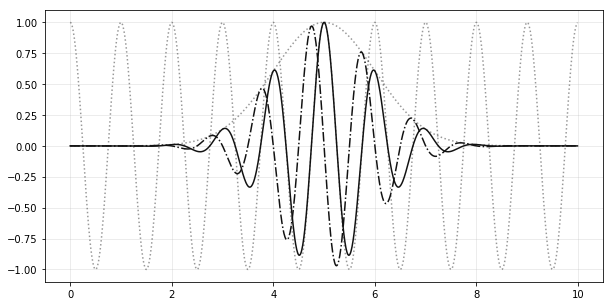

In [83]:
import numpy as np
import matplotlib.pyplot as plt 

def gaussian(t, sigma, mu):
    return np.e ** (-0.5*((t-mu)/sigma)**2)

def Plot(x,y,z):
    # plot the morlet atom
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
    plt.plot(t,np.real(x), color='#333333', linestyle=':', alpha=0.5)
    plt.plot(t,np.real(y), color='#333333', linestyle=':', alpha=0.5)
    plt.plot(t,np.real(z), color='#121212', linestyle='-')
    plt.plot(t,np.imag(z), color='#121212', linestyle='-.')

# sampling rate
Fs = 100
# sampling interval
Ts = 1.0/Fs
# time vector
t = np.arange(0, 10, Ts)
# frequency of the atom
w = 2*np.pi*1
x=np.e**(-1j*w*t)
# construct the morlet atom
y=gaussian(t, 1, 5)
morlet=x*y    
Plot(x,y,morlet)
